In [220]:
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from sklearn import cross_validation
from matplotlib import rcParams
from bs4 import BeautifulSoup
from pyquery import PyQuery as pq
from collections import defaultdict 
from imdb import IMDb
import pandas as pd
import cPickle as pickle
import io 
import time
import requests

from imdb import IMDb
ia = IMDb()

In [221]:
def get_mpaa(movieobj):
    try:
        mpaa = str(movieobj.data['mpaa']).split("Rated ", 1)[1].split(" ")[0]
    except:
        mpaa = np.nan
    return mpaa

In [246]:
BOdict = pickle.load(io.open('BOdict.p', 'rb'))

In [247]:
BOdf = pd.DataFrame(BOdict).transpose()

In [248]:
limiteddf = BOdf.dropna(subset=['budget', 'season', 'mpaa', 'opening'])

In [250]:
limiteddf['gross'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
limiteddf['opening'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
limiteddf['opening theaters'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [251]:
limiteddf.loc[limiteddf['opening']=='', 'opening']  = 0
limiteddf.loc[limiteddf['opening theaters']=='', 'opening theaters']  = 0

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [333]:
limiteddf['gross'] = limiteddf['gross'].astype(float)
limiteddf['opening'] = limiteddf['opening'].astype(float)
limiteddf['opening theaters'] = limiteddf['opening theaters'].astype(float)
limiteddf['budget'] = limiteddf['budget'].astype(float)
limiteddf['rating'] = limiteddf['rating'].astype(float)

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


KeyError: 'opening'

In [253]:
limiteddf.loc[limiteddf['season']==0, 'season'] = 'Jan-May'
limiteddf.loc[limiteddf['season']==1, 'season'] = 'June-Sep'
limiteddf.loc[limiteddf['season']==2, 'season'] = 'Oct-Nov'
limiteddf.loc[limiteddf['season']==3, 'season'] = 'Dec'

In [254]:
#Creating dummy variables for the various seasons
seasonlist = limiteddf.season.unique()
for season in seasonlist:
    limiteddf[season] = limiteddf['season']==season         

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [279]:
# Invoking a similar procedure to get_mpaa in order to process the rating
for i in limiteddf.index:
    try:
        limiteddf.loc[i, 'mpaa_new'] = limiteddf.loc[i, 'mpaa'].split("Rated ", 1)[1].split(" ")[0]
    except:
        limiteddf.loc[i, 'mpaa_new'] = 'PG-13'
limiteddf.loc[limiteddf['mpaa_new']=='PG-', 'mpaa_new'] = 'PG'
limiteddf.loc[limiteddf['mpaa_new']=='NC-17', 'mpaa_new'] = 'R'

In [283]:
#Creating dummy variables for the various MPAA Ratings
mpaalist = limiteddf.mpaa_new.unique()
for mpaa in mpaalist:
    limiteddf[mpaa] = limiteddf['mpaa_new']==mpaa

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [296]:
studiodf = limiteddf.groupby('studio') 
studioslist = studiodf['title'].count()
studioslist.sort(ascending=False)

In [297]:
limiteddf['prol_studio'] = False
for i in studioslist.index[:5]:
    limiteddf.loc[limiteddf['studio']==i,'prol_studio'] = True

WB
Uni.
Fox
Sony
Par.


/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [300]:
limiteddf['Tier_2'] = False
for i in studioslist.index[6:12]:
    limiteddf.loc[limiteddf['studio']==i,'Tier_2'] = True

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [286]:
limiteddf.rename(columns={'opening theaters': 'opening_theaters', 'opening': 'opening_gross'}, inplace=True)

#HERE BEGINS THE EDA

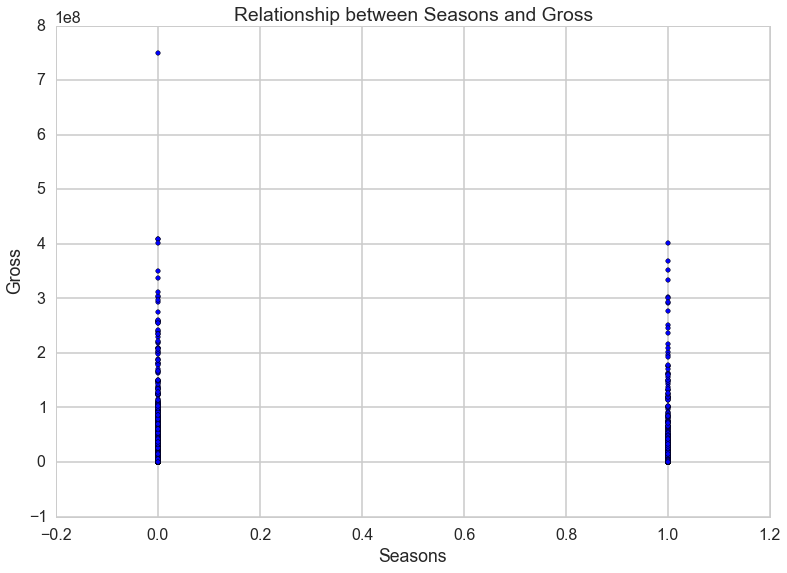

In [287]:
plt.scatter(limiteddf['June-Sep'], limiteddf.gross)
plt.xlabel("Seasons")
plt.ylabel("Gross")
plt.title("Relationship between Seasons and Gross")

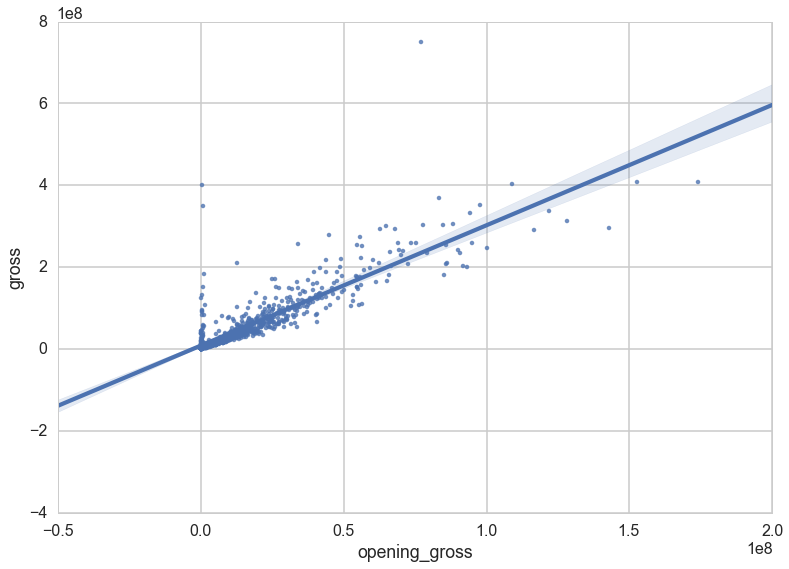

In [288]:
sns.regplot(y="gross", x="opening_gross", data=limiteddf, fit_reg = True)

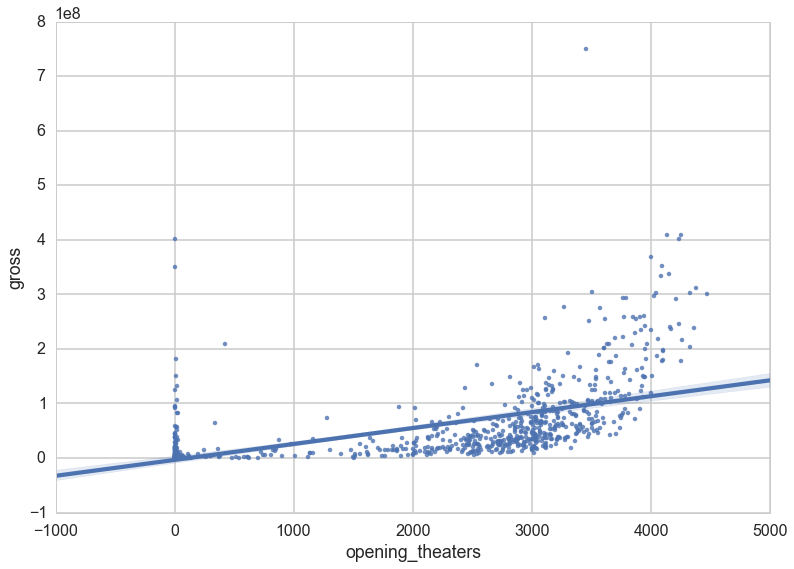

In [289]:
sns.regplot(y="gross", x="opening_theaters", data=limiteddf, fit_reg = True)

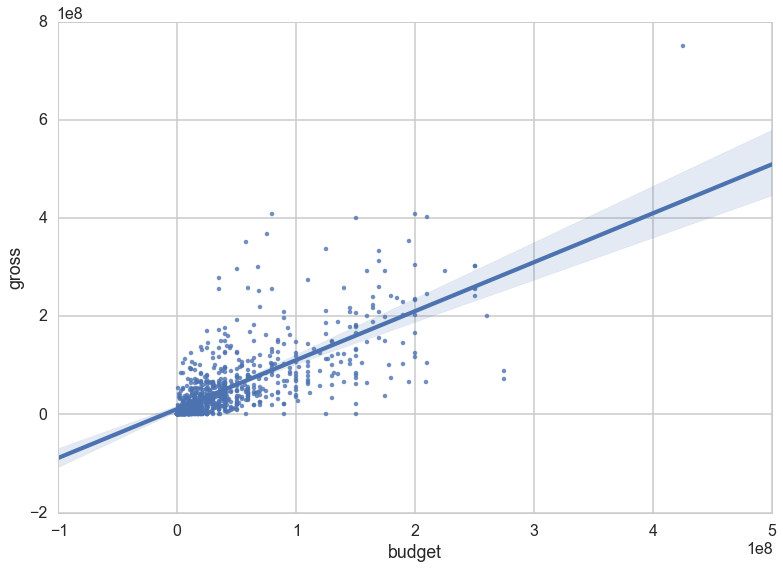

In [290]:
sns.regplot(y="gross", x="budget", data=limiteddf, fit_reg = True)

#ACTUALLY running models - Using StatsModel

Notice the difference in models when we include opening_gross and when we do not. If we include opening_gross, the number of theaters actually hurts a movie (statistically significant), while when we do not include opening_gross, there is a strong positive relationship between the number of theaters and the final gross number.

However, the R^2 for the model with both is much higher (~0.8) rather than with just the opening theaters (~0.55)

In [386]:
itrain, itest = train_test_split(xrange(limiteddf.shape[0]), train_size=0.6)
mask=np.ones(limiteddf.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
mask[:10]

array([False, False, False,  True,  True, False, False,  True,  True,  True], dtype=bool)

In [425]:
from statsmodels.formula.api import ols
m1 = ols('gross ~ budget + opening_theaters + season',limiteddf[mask]).fit()
print m1.summary()

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sat, 05 Dec 2015   Prob (F-statistic):           5.53e-77
Time:                        18:43:06   Log-Likelihood:                -9365.0
No. Observations:                 489   AIC:                         1.874e+04
Df Residuals:                     483   BIC:                         1.877e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           7.745e+06   7.69

In [388]:
m2 = ols('gross ~ budget + opening_theaters + opening_gross + season',limiteddf[mask]).fit()
print m2.summary()

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     316.9
Date:                Sat, 05 Dec 2015   Prob (F-statistic):          9.37e-164
Time:                        18:34:50   Log-Likelihood:                -9159.1
No. Observations:                 489   AIC:                         1.833e+04
Df Residuals:                     482   BIC:                         1.836e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           3.518e+07   5.17

In [389]:
m3 = ols('gross ~ budget + opening_theaters + opening_gross + season + prol_studio + Tier_2',limiteddf[mask]).fit()
print m3.summary()

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     238.1
Date:                Sat, 05 Dec 2015   Prob (F-statistic):          9.56e-162
Time:                        18:34:51   Log-Likelihood:                -9157.9
No. Observations:                 489   AIC:                         1.833e+04
Df Residuals:                     480   BIC:                         1.837e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            3.461e+07   5

In [391]:
m5 = ols('gross ~ budget + opening_gross + season + mpaa_new + rating + opening_theaters',limiteddf[mask]).fit()
print m5.summary()

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     247.4
Date:                Sat, 05 Dec 2015   Prob (F-statistic):          7.90e-174
Time:                        18:34:52   Log-Likelihood:                -9126.6
No. Observations:                 489   AIC:                         1.827e+04
Df Residuals:                     479   BIC:                         1.832e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept          -1.888e+07   1.18

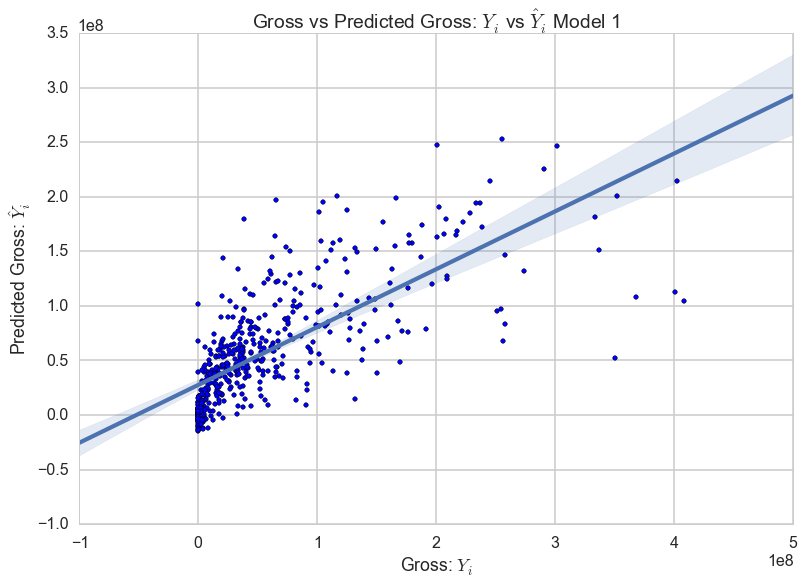

In [427]:
model1fit = zip(limiteddf[mask]['gross'],m1.fittedvalues)
m1df = pd.DataFrame(model1fit, columns=['observed gross','predicted gross'])
sns.regplot(y="predicted gross", x="observed gross", data=m1df, fit_reg = True)
plt.scatter(limiteddf[mask]['gross'], m.fittedvalues)
plt.xlabel("Gross: $Y_i$")
plt.ylabel("Predicted Gross: $\hat{Y}_i$")
plt.title("Gross vs Predicted Gross: $Y_i$ vs $\hat{Y}_i$ Model 1")

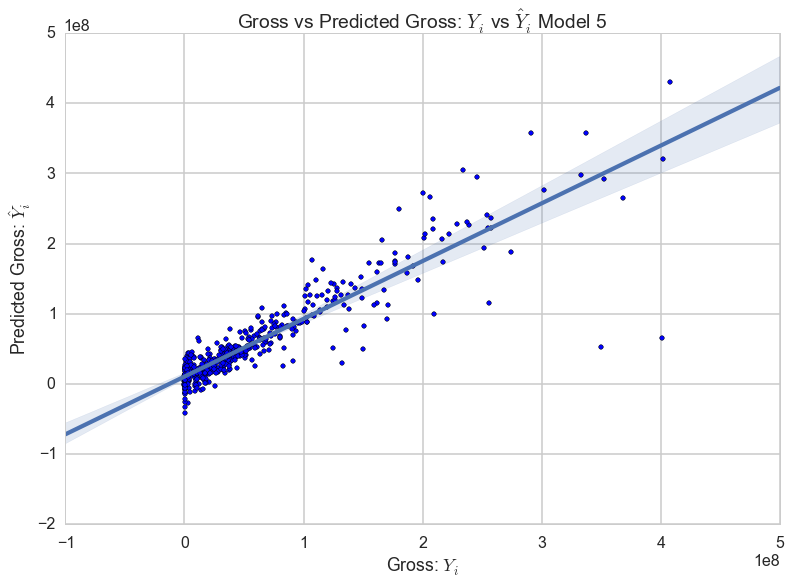

In [396]:
model5fit = zip(limiteddf[mask]['gross'],m5.fittedvalues)
m5df = pd.DataFrame(model5fit, columns=['observed gross','predicted gross'])
sns.regplot(y="predicted gross", x="observed gross", data=m5df, fit_reg = True)
plt.scatter(limiteddf[mask]['gross'], m5.fittedvalues)
plt.xlabel("Gross: $Y_i$")
plt.ylabel("Predicted Gross: $\hat{Y}_i$")
plt.title("Gross vs Predicted Gross: $Y_i$ vs $\hat{Y}_i$ Model 5")


#Using SKlearn as an analysis alternative

In [397]:
from sklearn.linear_model import LinearRegression
X = limiteddf[['Jan-May','June-Sep','Dec', 'budget', 'opening_gross', 'opening_theaters', 'PG-13', 'R', 'rating']]

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [398]:
lm.fit(X, limiteddf.gross)
print 'Estimated intercept coefficient:', lm.intercept_
print 'Number of coefficients:', len(lm.coef_)
# The coefficients
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

Estimated intercept coefficient: -41791651.131
Number of coefficients: 9


,features,estimatedCoefficients
0,Jan-May,-7612229.201339
1,June-Sep,-1313521.297375
2,Dec,23409269.009113
3,budget,0.245320
4,opening_gross,2.597831
5,opening_theaters,-2401.641983
6,PG-13,-12093009.987119
7,R,-12253362.019305
8,rating,9357663.589710


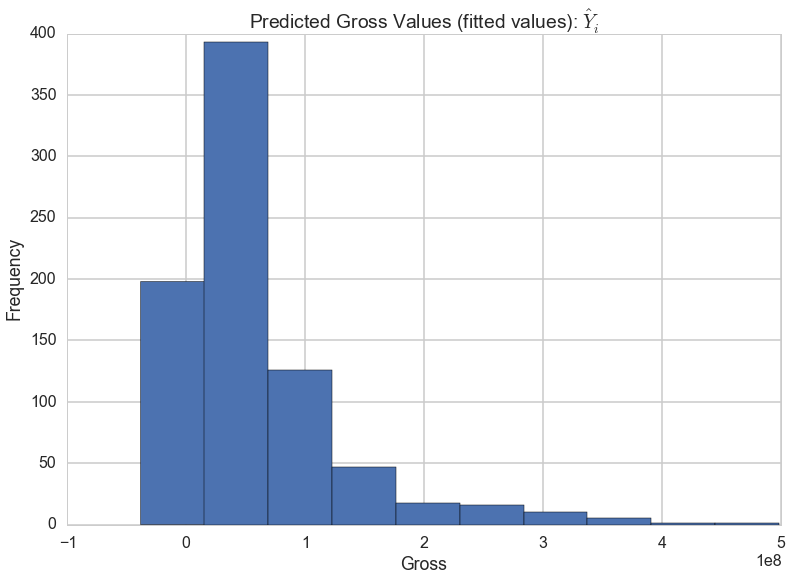

In [399]:
plt.hist(lm.predict(X))
plt.title('Predicted Gross Values (fitted values): $\hat{Y}_i$')
plt.xlabel('Gross')
plt.ylabel('Frequency')

#Creating a train/test set to rework lm and calculate MSE

In [403]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, limiteddf.gross, test_size=0.33, random_state = 5)
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(546, 9)
(269, 9)
(546,)
(269,)


In [404]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [405]:
# your turn
print "Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2)
print "Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 9.48445922545e+14
Fit a model X_train, and calculate MSE with X_test, Y_test: 1.2602605992e+15


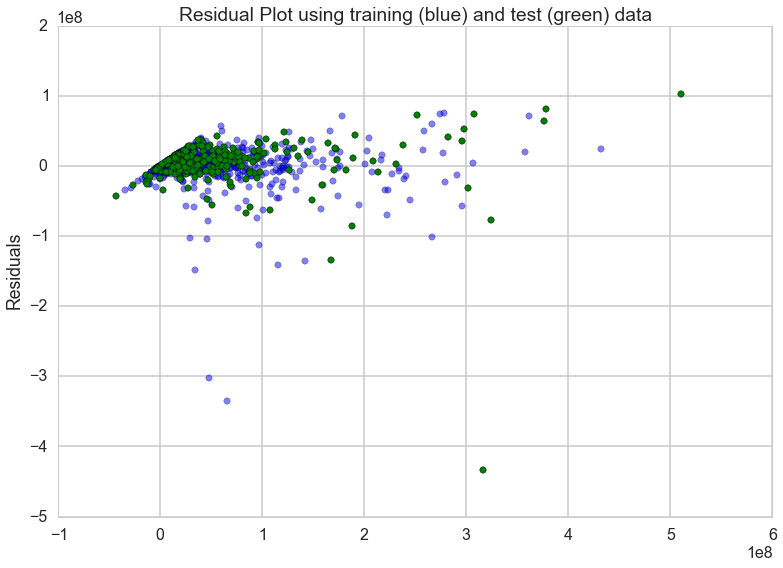

In [406]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

#Tuning hyperparameters if we were to use other types of regression

In [407]:
def cv_optimize(regmodel, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(regmodel, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(regmodel, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    best = gs.best_estimator_
    return best
def do_regression(regmodel, parameters, indf, featurenames, mask=None, 
                  reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=indf['gross']
    print featurenames
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        regmodel = cv_optimize(regmodel, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    regmodel=regmodel.fit(Xtrain, ytrain)
    training_accuracy = regmodel.score(Xtrain, ytrain)
    test_accuracy = regmodel.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print "########################################################"
    return regmodel, Xtrain, ytrain, Xtest, ytest

In [408]:
##Using a budget-only as the baseline

reg_1 = Lasso()
parameters = {"fit_intercept": [True, False], "normalize":[True, False], "copy_X":[True, False], "max_iter":[10,100,1000],
             "tol": [0.0001,0.001, 0.00001,0.01]}
reg_1, Xtrain, ytrain, Xtest, ytest=do_regression(reg_1, parameters, limiteddf, ['budget'], mask=mask, score_func = 'r2')

['budget']
using mask
############# based on standard predict ################
Accuracy on training data: 0.49
Accuracy on test data:     0.56
########################################################


/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [409]:
##Incorporating # of Openings theaters

reg_2 = Lasso()
parameters = {"fit_intercept": [True, False], "normalize":[True, False], "copy_X":[True, False], "max_iter":[10,100,1000],
             "tol": [0.0001,0.001, 0.00001,0.01]}
reg_2, Xtrain, ytrain, Xtest, ytest=do_regression(reg_2, parameters, limiteddf, ['budget', 'opening_theaters'], mask=mask, score_func = 'mean_squared_error')

['budget', 'opening_theaters']
using mask
############# based on standard predict ################
Accuracy on training data: 0.52
Accuracy on test data:     0.57
########################################################


/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [410]:
##Incorporating Opening Weekend Gross

reg_3 = Lasso()
parameters = {"fit_intercept": [True, False], "normalize":[True, False], "copy_X":[True, False], "max_iter":[10,100,1000],
             "tol": [0.0001,0.001, 0.00001,0.01]}
reg_3, Xtrain, ytrain, Xtest, ytest=do_regression(reg_3, parameters, limiteddf, ['budget', 'opening_theaters', 'opening_gross'], mask=mask, score_func = 'mean_squared_error')

['budget', 'opening_theaters', 'opening_gross']
using mask
############# based on standard predict ################
Accuracy on training data: 0.78
Accuracy on test data:     0.78
########################################################


/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [411]:
reg_4 = Lasso()
parameters = {"fit_intercept": [True, False], "normalize":[True, False], "copy_X":[True, False], "max_iter":[10,100,1000],
             "tol": [0.0001,0.001, 0.01]}
reg_4, Xtrain, ytrain, Xtest, ytest=do_regression(reg_4, parameters, limiteddf, ['Jan-May', 'June-Sep', 'Dec', 'budget', 'opening_gross', 'opening_theaters'], mask=mask, score_func = 'mean_squared_error')

['Jan-May', 'June-Sep', 'Dec', 'budget', 'opening_gross', 'opening_theaters']
using mask
############# based on standard predict ################
Accuracy on training data: 0.80
Accuracy on test data:     0.80
########################################################


/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [412]:
#With Studio in there
reg_5 = Lasso()
parameters = {"fit_intercept": [True, False], "normalize":[True, False], "copy_X":[True, False], "max_iter":[10,100,1000],
             "tol": [0.0001,0.001, 0.01]}
reg_5, Xtrain, ytrain, Xtest, ytest=do_regression(reg_5, parameters, limiteddf, ['prol_studio', 'Jan-May', 'June-Sep', 'Dec', 'budget', 'opening_gross', 'opening_theaters'], mask=mask, score_func = 'mean_squared_error')

['prol_studio', 'Jan-May', 'June-Sep', 'Dec', 'budget', 'opening_gross', 'opening_theaters']
using mask
############# based on standard predict ################
Accuracy on training data: 0.80
Accuracy on test data:     0.80
########################################################


/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [413]:
#With Studio and 2nd tier studio in there
reg_6 = Lasso()
parameters = {"fit_intercept": [True, False], "normalize":[True, False], "copy_X":[True, False], "max_iter":[10,100,1000],
             "tol": [0.0001,0.001, 0.01]}
reg_6, Xtrain, ytrain, Xtest, ytest=do_regression(reg_6, parameters, limiteddf, ['prol_studio','Tier_2', 'Jan-May', 'June-Sep', 'Oct-Nov', 'budget', 'opening_gross', 'opening_theaters'], mask=mask, score_func = 'mean_squared_error')

['prol_studio', 'Tier_2', 'Jan-May', 'June-Sep', 'Oct-Nov', 'budget', 'opening_gross', 'opening_theaters']
using mask
############# based on standard predict ################
Accuracy on training data: 0.80
Accuracy on test data:     0.80
########################################################


/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [414]:
#With MPAA Rating in there
reg_7 = Lasso()
parameters = {"fit_intercept": [True, False], "normalize":[True, False], "copy_X":[True, False], "max_iter":[10,100,1000],
             "tol": [0.0001,0.001, 0.01]}
reg_7, Xtrain, ytrain, Xtest, ytest=do_regression(reg_7, parameters, limiteddf, [ 'Jan-May', 'June-Sep', 'Oct-Nov', 'budget', 'opening_gross', 'opening_theaters','prol_studio','Tier_2', 'PG-13', 'R'], mask=mask, score_func = 'mean_squared_error')

['Jan-May', 'June-Sep', 'Oct-Nov', 'budget', 'opening_gross', 'opening_theaters', 'prol_studio', 'Tier_2', 'PG-13', 'R']
using mask
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.79
########################################################


/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [420]:
#With IMDb Movie Rating in there
reg_8 = Lasso()
parameters = {"fit_intercept": [True, False], "normalize":[True, False], "copy_X":[True, False], "max_iter":[10,100,1000],
             "tol": [0.0001,0.001, 0.01]}
reg_8, Xtrain, ytrain, Xtest, ytest=do_regression(reg_8, parameters, limiteddf, [ 'Jan-May', 'June-Sep', 'Oct-Nov', 'budget', 'opening_gross', 'opening_theaters', 'PG-13', 'R', 'rating'], mask=mask, score_func = 'mean_squared_error')

['Jan-May', 'June-Sep', 'Oct-Nov', 'budget', 'opening_gross', 'opening_theaters', 'PG-13', 'R', 'rating']
using mask
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.79
########################################################


/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [421]:
from sklearn.feature_selection import chi2
scores, pvalues = chi2(Xtrain, ytrain)

In [422]:
print 'Estimated intercept coefficient:', reg_8.intercept_
print 'Number of coefficients:', len(reg_8.coef_)
# The coefficients
print reg_8.intercept_
pd.DataFrame(zip(['Jan-May', 'June-Sep', 'Oct-Nov', 'budget', 'opening_gross', 'opening_theaters', 'PG-13','R', 'rating'], reg_8.coef_, scores, pvalues), columns = ['features', 'estimatedCoefficients', 'scores', 'pvalues'])

Estimated intercept coefficient: -18880695.9985
Number of coefficients: 9
-18880695.9985


,features,estimatedCoefficients,scores,pvalues
0,Jan-May,-31156168.686331,3.390000e+02,1.000000
1,June-Sep,-26719979.551286,3.110000e+02,1.000000
2,Oct-Nov,-21587773.688809,3.770000e+02,0.999939
3,budget,0.153169,2.728422e+10,0.000000
4,opening_gross,2.739038,1.363659e+10,0.000000
5,opening_theaters,-2540.366262,4.941371e+05,0.000000
6,PG-13,-17811301.113582,2.820000e+02,1.000000
7,R,-18230066.256409,2.850000e+02,1.000000
8,rating,10759584.653732,7.602124e+01,1.000000


In [418]:
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     247.4
Date:                Sat, 05 Dec 2015   Prob (F-statistic):          7.90e-174
Time:                        18:39:15   Log-Likelihood:                -9126.6
No. Observations:                 489   AIC:                         1.827e+04
Df Residuals:                     479   BIC:                         1.832e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept          -1.888e+07   1.18e+07     -1.596      0.111     -4.21e+07  4.37e+06
season[T.Jan-May]  -3.116e+07   5.36e+06     -5.814      0.000     -4.17e+07 -2.06e+07
season[T.June-Sep] -2.672e+07   5.16e+06     -5.177      0.000     -3.69e+07 -1.66e+07
season[T.Oct-Nov]  -2.159e+07    5.4e+06     -4.001      0.000     -3.22e+07  -1.1e+07
mpaa_new[T.PG-13]  -1.781e+07   4.25e+06     -4.189      0.000     -2.62e+07 -9.46e+06
mpaa_new[T.R]      -1.823e+07    4.5e+06     -4.047      0.000     -2.71e+07 -9.38e+06
budget                 0.1532      0.042      3.672      0.000         0.071     0.235
opening_gross          2.7390      0.108     25.417      0.000         2.527     2.951
rating              1.076e+07   1.52e+06      7.076      0.000      7.77e+06  1.37e+07
opening_theaters   -2540.3658   1480.513     -1.716      0.087     -5449.469   368.738
==============================================================================
Omnibus:                      547.714   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46295.587
Skew:                           5.028   Prob(JB):                         0.00
Kurtosis:                      49.594   Cond. No.                     6.68e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""